## Image compression with SVD

We have seen that SVD allows one to decompose any $m \times n$ matrix $A$, into the product of the orthogonal matrices $U$ and $V$ and a "diagonal" matrix $\Sigma$:

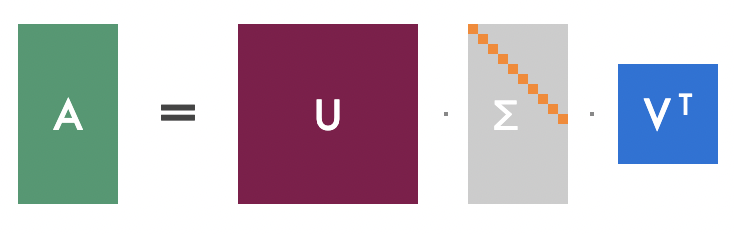

We have also discussed that we can *approximate* the original matrix $A$ by using only some parts of the matrices $U, V$ and $\Sigma$:

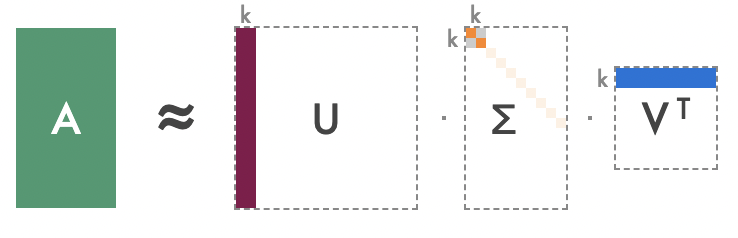

You can notice that this approximation can help us save quite a lot of space. Indeed, inspeat of storing $m \times n$ of the original values in A we now need to store only $m \times k + k + k \times n = k \times (m + n + 1)$ values. **Since images can be represented as matrices of pixel values, we can use this idea and compress images with SVD!**

Here are some videos that explain this idea and give some examples that you might want to watch before attempting the task:
- [SVD and Image Compression](https://youtu.be/DG7YTlGnCEo)
- [SVD: Image Compression in Python](https://youtu.be/H7qMMudo3e8)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

First, let's load the image into a $\texttt{numpy}$ array and display it.

You can use *any* image of your choice, or upload one of the sample images provided [in our repo](https://github.com/girafe-ai/math-basics-for-ai/tree/master/graded%20assignments/img).

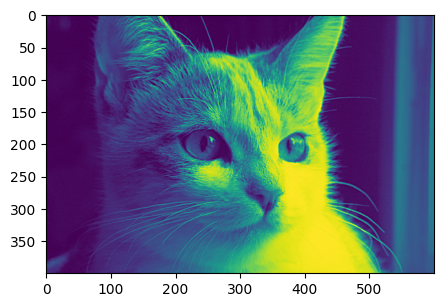

In [2]:
path = 'C:/coding_bootcamp/Intensive_bootcamp/ds_intensive_course/W1_D3/W1_D3/W1_D3_notebooks/grayscale_cat.jpg'

img_rgb = plt.imread(path)

plt.figure(figsize=(5, 10))
plt.imshow(img_rgb)

Note how image is represented in the RGB format:

In [3]:
print(img_rgb.shape)
img_rgb

(400, 600)


array([[  6,   4,   6, ...,  54,  79, 102],
       [  6,   6,   5, ...,  51,  78, 102],
       [  5,   8,   7, ...,  51,  82, 103],
       ...,
       [ 36,  35,  34, ...,  73,  76,  75],
       [ 34,  35,  35, ...,  73,  76,  77],
       [ 38,  37,  35, ...,  74,  76,  75]], dtype=uint8)

For simplicity, let's make our image black-and-white (this way, we'll only need to work with a single channel). We'll do this by averaging the signals from the red, green and blue channels for each pixel.

In [4]:
#img_grayscale = np.mean(img_rgb, axis=-1) #takes average across columns
img_grayscale = img_rgb

Now, our image is represented as an $m \times n$ matrix:

In [5]:
print(img_grayscale.shape)
img_grayscale

(400, 600)


array([[  6,   4,   6, ...,  54,  79, 102],
       [  6,   6,   5, ...,  51,  78, 102],
       [  5,   8,   7, ...,  51,  82, 103],
       ...,
       [ 36,  35,  34, ...,  73,  76,  75],
       [ 34,  35,  35, ...,  73,  76,  77],
       [ 38,  37,  35, ...,  74,  76,  75]], dtype=uint8)

We can plot the grayscale image:

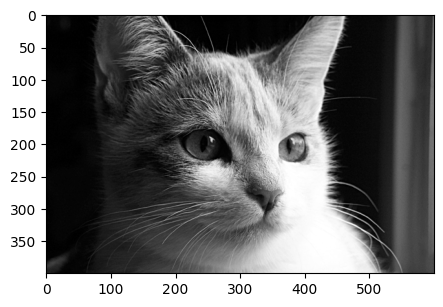

In [6]:
plt.figure(figsize=(5, 10))
plt.imshow(img_grayscale, cmap='gray')

Apply SVD on the image matrix $M$, decomposing it into the product of the orthogonal matrices $U$ and $V$ and a "diagonal" matrix $\Sigma$:

$$M_{m \times n} = U_{m \times m} \Sigma_{m \times n} V_{n \times n}^T$$

*You can use [$\texttt{np.linalg.svd()}$](https://numpy.org/doc/stable/reference/generated/numpy.linalg.svd.html) to perform SVD.*

In [7]:
U, sigma, V = np.linalg.svd(img_grayscale)

**(1 point)** Demonstrate how you can get your image matrix back as a product of $U$, $V$ and $\Sigma$ *(express image matrix $M$ as a product of the three matrices and plot the resulting image, making sure it's the same as before)*.

In [37]:
singular_val_mat = (np.diag(sigma))
singular_val_mat = np.pad(singular_val_mat, ((0,0), (0,200)), mode='constant')

reconstructed_img = U [:, :10] @ singular_val_mat[:10, :10] @ V[:10, :]

In [49]:
# dummy code to understand the above way of slicing a matrix
a = np.array([[1, 2, 3],
             [4, 5, 6],
             [7, 8, 9]])
print(a)
a[:, :2] #all rows and firsr two columns
a[:, 2] #all rows and second column
a[:2, :2] #first two rows and first two columns

[[1 2 3]
 [4 5 6]
 [7 8 9]]


array([[1, 2],
       [4, 5]])

Now, let's compress the original image! Remember that with SVD, you can approximate the original  matrix by considering only $p$ of the hidden features:

$$M_{m \times n} \approx U_{m \times p} \Sigma_{p \times p} V_{n \times p}^T$$

**(2 points)** Try reconstructing the image by using only $5, 10, ..., 100$ hidden features. Plot what happens.

*Hint: use [$\texttt{plt.subplot()}$](https://matplotlib.org/stable/gallery/subplots_axes_and_figures/subplots_demo.html) to place several images on the same plot.*

In [ ]:
no_of_features = [5, 10, 15, 30]
fig, ax = plt.subplots(1, len(no_of_features), figsize=(10,12))
for i in range(len(no_of_features)):
    reconstructed_img = U [:, :no_of_features[i]] @ singular_val_mat[:no_of_features[i], :no_of_features[i]] @ V[:no_of_features[i], :]
    ax[i].imshow(reconstructed_img) 